# TensorFlow Assignment: Multilayer Perceptron (MLP) Optimizer Sandbox

**[Duke Community Standard](http://integrity.duke.edu/standard.html): By typing your name below, you are certifying that you have adhered to the Duke Community Standard in completing this assignment.**

Name: [YOUR NAME HERE]

## Multilayer Perceptron (MLP)

### Imports and helper functions

Let's play around with some optimizers. First some imports and helper functions:

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

# Import data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [2]:
# Helper functions for creating weight variables
def weight_variable(shape):
    """weight_variable generates a weight variable of a given shape."""
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    """bias_variable generates a bias variable of a given shape."""
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

### Models

And here's the forward pass of the computation graph definition of the completed TensorFlow MLP assignment:

In [3]:
# Model Inputs
x = tf.placeholder(tf.float32, [None, 784])
y_ = tf.placeholder(tf.float32, [None, 10])

# Define the graph
# First fully connected layer
W_fc1 = weight_variable([784, 500])
b_fc1 = bias_variable([500])
# h_fc1 = tf.nn.sigmoid(tf.matmul(x, W_fc1) + b_fc1)
h_fc1 = tf.nn.relu(tf.matmul(x, W_fc1) + b_fc1)

# Second fully connected layer
W_fc2 = weight_variable([500, 10])
b_fc2 = bias_variable([10])
y_mlp = tf.matmul(h_fc1, W_fc2) + b_fc2

# Loss 
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y_mlp))

# Evaluation
correct_prediction = tf.equal(tf.argmax(y_mlp, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

### Optimizers

Instead of the optimizer being given though, let's try out a few. Here we have optimizers implementing algorithms for [Stochastic Gradient Descent](https://www.tensorflow.org/api_docs/python/tf/train/GradientDescentOptimizer) (SGD), [Stochastic Gradient Descent with Momentum](https://www.tensorflow.org/api_docs/python/tf/train/MomentumOptimizer) (momentum), and [Adaptive Moments](https://www.tensorflow.org/api_docs/python/tf/train/AdamOptimizer) (ADAM). Try out different parameter settings (e.g. learning rate) for each of them.

In [45]:
# Optimizers: Try out a few different parameters for SGD and SGD momentum
train_step_SGD = tf.train.GradientDescentOptimizer(learning_rate=1e-3).minimize(cross_entropy)
train_step_momentum = tf.train.MomentumOptimizer(learning_rate=1e-3, momentum=0.99).minimize(cross_entropy)
train_step_ADAM = tf.train.AdamOptimizer(learning_rate=1e-3,beta1=0.9,beta2=0.999,).minimize(cross_entropy)

# Op for initializing all variables
initialize_all = tf.global_variables_initializer()

### Training

Because we'll be repeating training a few times, let's move our training regimen into function. Note that we pass which optimization algorithm we're running as an argument. In addition to printing out the validation accuracy and final test accuracy, we'll also return the lists of accuracies at each validation step and the training losses at each iteration.

In [46]:
def train_MLP(train_step_optimizer, iterations=20000):
    with tf.Session() as sess:
        # Initialize (or reset) all variables
        sess.run(initialize_all)
        
        # Initialize arrays to track losses and validation accuracies
        valid_accs = [] 
        losses = []
        
        for i in range(iterations):
            # Validate every 250th batch
            if i % 250 == 0:
                validation_accuracy = 0
                for v in range(10):
                    batch = mnist.validation.next_batch(50)
                    validation_accuracy += (1/10) * accuracy.eval(feed_dict={x: batch[0], y_: batch[1]})
                print('step %d, validation accuracy %g' % (i, validation_accuracy))
                valid_accs.append(validation_accuracy)
                
            # Train    
            batch = mnist.train.next_batch(50)
            loss, _ = sess.run([cross_entropy, train_step_optimizer], feed_dict={x: batch[0], y_: batch[1]})
            losses.append(loss)
            
        print('test accuracy %g' % accuracy.eval(feed_dict={x: mnist.test.images, y_: mnist.test.labels}))
        
    return valid_accs, losses

Finally, let's train the MLP using all three optimizers and compare the results:

### Test-1: Compare SGD, SGD Momentum and ADAM

In [47]:
print("SGD:")
valid_accs_SGD, losses_SGD = train_MLP(train_step_SGD)
print("Momentum:")
valid_accs_momentum, losses_momentum = train_MLP(train_step_momentum)
print("ADAM:")
valid_accs_ADAM, losses_ADAM = train_MLP(train_step_ADAM)

SGD:
step 0, validation accuracy 0.082
step 250, validation accuracy 0.326
step 500, validation accuracy 0.596
step 750, validation accuracy 0.694
step 1000, validation accuracy 0.706
step 1250, validation accuracy 0.778
step 1500, validation accuracy 0.788
step 1750, validation accuracy 0.842
step 2000, validation accuracy 0.838
step 2250, validation accuracy 0.834
step 2500, validation accuracy 0.874
step 2750, validation accuracy 0.862
step 3000, validation accuracy 0.848
step 3250, validation accuracy 0.848
step 3500, validation accuracy 0.856
step 3750, validation accuracy 0.87
step 4000, validation accuracy 0.88
step 4250, validation accuracy 0.868
step 4500, validation accuracy 0.878
step 4750, validation accuracy 0.874
step 5000, validation accuracy 0.898
step 5250, validation accuracy 0.87
step 5500, validation accuracy 0.872
step 5750, validation accuracy 0.864
step 6000, validation accuracy 0.886
step 6250, validation accuracy 0.892
step 6500, validation accuracy 0.92
step 6

step 14750, validation accuracy 0.98
step 15000, validation accuracy 0.982
step 15250, validation accuracy 0.984
step 15500, validation accuracy 0.98
step 15750, validation accuracy 0.97
step 16000, validation accuracy 0.984
step 16250, validation accuracy 0.984
step 16500, validation accuracy 0.994
step 16750, validation accuracy 0.98
step 17000, validation accuracy 0.972
step 17250, validation accuracy 0.99
step 17500, validation accuracy 0.974
step 17750, validation accuracy 0.98
step 18000, validation accuracy 0.984
step 18250, validation accuracy 0.972
step 18500, validation accuracy 0.976
step 18750, validation accuracy 0.976
step 19000, validation accuracy 0.982
step 19250, validation accuracy 0.982
step 19500, validation accuracy 0.996
step 19750, validation accuracy 0.986
test accuracy 0.9792


### Visualization

Plotting things:

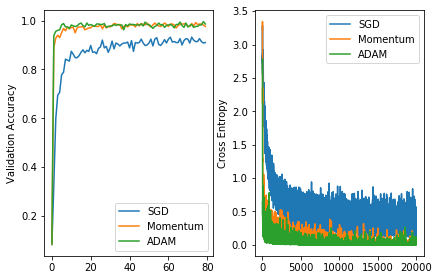

In [48]:
fig, ax = plt.subplots(1, 2)
fig.tight_layout()

ax[0].plot(valid_accs_SGD)
ax[0].plot(valid_accs_momentum)
ax[0].plot(valid_accs_ADAM)

ax[0].set_ylabel('Validation Accuracy')
ax[0].legend(['SGD', 'Momentum', 'ADAM'], loc='lower right')

ax[1].plot(losses_SGD)
ax[1].plot(losses_momentum)
ax[1].plot(losses_ADAM)

ax[1].set_ylabel('Cross Entropy')
ax[1].legend(['SGD', 'Momentum', 'ADAM'], loc='upper right')
# ax[1].set_ylim([0,1.5])  # <- Use this to change y-axis limits

### Short Answer

How do SGD, SGD with momentum, and ADAM compare in performance? Ease of tuning parameters?

***
Performance comparison of SGD/SGD with momentum/ADAM
Same learning rates (1e-3) was used for SGD and SGD with momentum.And default parameters were used for ADAM. 

**Convergence rate:**3
From both (1) validation accuracy and (2) cross entropy variation of time, it can be seen that ADAM converges slightly faster than SGD with momentum. And both ADAM and SGD with momentum converge much faster than SGD algorithm.

<br>
**Validation accuracy:**
In term of validation accuracy, ADAM and SGD with momentum shows competitive performance and achieve a a high validation accuracy at ~0.98, while SGD saturated with a less accurate results as ~0.92.


***

### Test 2 - SGD with Multiple Learning Rate

In [49]:
train_step_SGD_1e1 = tf.train.GradientDescentOptimizer(learning_rate=1e-1).minimize(cross_entropy)
train_step_SGD_1e2 = tf.train.GradientDescentOptimizer(learning_rate=1e-2).minimize(cross_entropy)
train_step_SGD_1e3 = tf.train.GradientDescentOptimizer(learning_rate=1e-3).minimize(cross_entropy)
# Op for initializing all variables
initialize_all = tf.global_variables_initializer()

In [50]:
print("SGD 1e-1:")
valid_accs_SGD_1, losses_SGD_1 = train_MLP(train_step_SGD_1e1)
print("SGD 1e-2:")
valid_accs_SGD_2, losses_SGD_2 = train_MLP(train_step_SGD_1e2)
print("SGD 1e-3:")
valid_accs_SGD_3, losses_SGD_3 = train_MLP(train_step_SGD_1e3)

SGD 1e-1:
step 0, validation accuracy 0.108
step 250, validation accuracy 0.92
step 500, validation accuracy 0.934
step 750, validation accuracy 0.932
step 1000, validation accuracy 0.952
step 1250, validation accuracy 0.948
step 1500, validation accuracy 0.96
step 1750, validation accuracy 0.97
step 2000, validation accuracy 0.948
step 2250, validation accuracy 0.962
step 2500, validation accuracy 0.97
step 2750, validation accuracy 0.974
step 3000, validation accuracy 0.966
step 3250, validation accuracy 0.958
step 3500, validation accuracy 0.972
step 3750, validation accuracy 0.988
step 4000, validation accuracy 0.966
step 4250, validation accuracy 0.962
step 4500, validation accuracy 0.968
step 4750, validation accuracy 0.962
step 5000, validation accuracy 0.986
step 5250, validation accuracy 0.988
step 5500, validation accuracy 0.974
step 5750, validation accuracy 0.984
step 6000, validation accuracy 0.964
step 6250, validation accuracy 0.964
step 6500, validation accuracy 0.974
s

step 14750, validation accuracy 0.916
step 15000, validation accuracy 0.908
step 15250, validation accuracy 0.912
step 15500, validation accuracy 0.892
step 15750, validation accuracy 0.914
step 16000, validation accuracy 0.918
step 16250, validation accuracy 0.926
step 16500, validation accuracy 0.912
step 16750, validation accuracy 0.91
step 17000, validation accuracy 0.918
step 17250, validation accuracy 0.936
step 17500, validation accuracy 0.914
step 17750, validation accuracy 0.922
step 18000, validation accuracy 0.906
step 18250, validation accuracy 0.918
step 18500, validation accuracy 0.916
step 18750, validation accuracy 0.89
step 19000, validation accuracy 0.926
step 19250, validation accuracy 0.902
step 19500, validation accuracy 0.916
step 19750, validation accuracy 0.924
test accuracy 0.9156


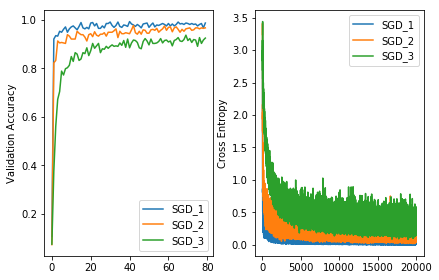

In [51]:
fig, ax = plt.subplots(1, 2)
fig.tight_layout()

ax[0].plot(valid_accs_SGD_1)
ax[0].plot(valid_accs_SGD_2)
ax[0].plot(valid_accs_SGD_3)

ax[0].set_ylabel('Validation Accuracy')
ax[0].legend(['SGD_1', 'SGD_2', 'SGD_3'], loc='lower right')

ax[1].plot(losses_SGD_1)
ax[1].plot(losses_SGD_2)
ax[1].plot(losses_SGD_3)

ax[1].set_ylabel('Cross Entropy')
ax[1].legend(['SGD_1', 'SGD_2', 'SGD_3'], loc='upper right')
# ax[1].set_ylim([0,1.5])  # <- Use this to change y-axis limits

***
Performance comparison of SGD with different learning rate: 
- (1) 1e-1
- (2) 1e-2
- (3) 1e-3


**Convergence rate:**
The convergence rate agrees well with theory, that is, a larger step size converges faster. In this case specifically, we can see that:
 SGD with alpha = 1e-1 > 1e-2 > 1e-3

<br>
**Validation accuracy:**
In term of validation accuracy, the results shown here seems not agree well with theorical case. In theory, a larger step size gives larger variance. However, the results here (with finite iteration steps here) shows SGD with larger step size has higher accuracy. This can be attribute to the reason that SGD with 1e-3 takes much longer time to converge.

***

### Test-3: SGD with Momentm with different parameters

In [52]:
train_step_momentum_1 = tf.train.MomentumOptimizer(learning_rate=1e-3, momentum=0.3).minimize(cross_entropy)
train_step_momentum_2 = tf.train.MomentumOptimizer(learning_rate=1e-3, momentum=0.6).minimize(cross_entropy)
train_step_momentum_3 = tf.train.MomentumOptimizer(learning_rate=1e-3, momentum=0.9).minimize(cross_entropy)

# Op for initializing all variables
initialize_all = tf.global_variables_initializer()

In [53]:
print("SGDm 0.3:")
valid_accs_SGDm_1, losses_SGDm_1 = train_MLP(train_step_momentum_1)
print("SGDm 0.6:")
valid_accs_SGDm_2, losses_SGDm_2 = train_MLP(train_step_momentum_2)
print("SGDm 0.9:")
valid_accs_SGDm_3, losses_SGDm_3 = train_MLP(train_step_momentum_3)

SGDm 0.3:
step 0, validation accuracy 0.178
step 250, validation accuracy 0.484
step 500, validation accuracy 0.676
step 750, validation accuracy 0.76
step 1000, validation accuracy 0.822
step 1250, validation accuracy 0.81
step 1500, validation accuracy 0.818
step 1750, validation accuracy 0.828
step 2000, validation accuracy 0.838
step 2250, validation accuracy 0.83
step 2500, validation accuracy 0.87
step 2750, validation accuracy 0.866
step 3000, validation accuracy 0.89
step 3250, validation accuracy 0.854
step 3500, validation accuracy 0.876
step 3750, validation accuracy 0.898
step 4000, validation accuracy 0.898
step 4250, validation accuracy 0.886
step 4500, validation accuracy 0.896
step 4750, validation accuracy 0.872
step 5000, validation accuracy 0.922
step 5250, validation accuracy 0.902
step 5500, validation accuracy 0.906
step 5750, validation accuracy 0.902
step 6000, validation accuracy 0.902
step 6250, validation accuracy 0.912
step 6500, validation accuracy 0.904
st

step 14750, validation accuracy 0.97
step 15000, validation accuracy 0.94
step 15250, validation accuracy 0.962
step 15500, validation accuracy 0.966
step 15750, validation accuracy 0.946
step 16000, validation accuracy 0.972
step 16250, validation accuracy 0.97
step 16500, validation accuracy 0.954
step 16750, validation accuracy 0.956
step 17000, validation accuracy 0.956
step 17250, validation accuracy 0.952
step 17500, validation accuracy 0.966
step 17750, validation accuracy 0.96
step 18000, validation accuracy 0.956
step 18250, validation accuracy 0.966
step 18500, validation accuracy 0.974
step 18750, validation accuracy 0.96
step 19000, validation accuracy 0.964
step 19250, validation accuracy 0.974
step 19500, validation accuracy 0.968
step 19750, validation accuracy 0.956
test accuracy 0.962


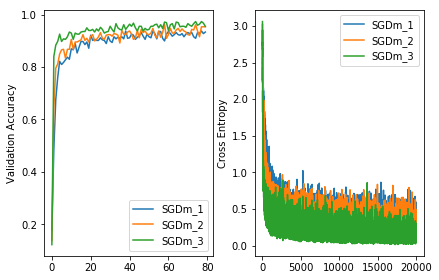

In [54]:
fig, ax = plt.subplots(1, 2)
fig.tight_layout()

ax[0].plot(valid_accs_SGDm_1)
ax[0].plot(valid_accs_SGDm_2)
ax[0].plot(valid_accs_SGDm_3)

ax[0].set_ylabel('Validation Accuracy')
ax[0].legend(['SGDm_1', 'SGDm_2', 'SGDm_3'], loc='lower right')

ax[1].plot(losses_SGDm_1)
ax[1].plot(losses_SGDm_2)
ax[1].plot(losses_SGDm_3)

ax[1].set_ylabel('Cross Entropy')
ax[1].legend(['SGDm_1', 'SGDm_2', 'SGDm_3'], loc='upper right')
# ax[1].set_ylim([0,1.5])  # <- Use this to change y-axis limits

***
Performance comparison of SGD with momentum different weights for momentum term: 
- (1) 0.3
- (2) 0.6
- (3) 0.9


**Convergence rate:**
The convergence rate agrees well with theory, that is, a larger step size converges faster. In this case specifically, we can see that:
 SGD with momentum weights = 0.9 > 0.6 > 0.3

<br>
**Validation accuracy:**
In term of validation accuracy, the results here shown that a larger weights on momentum term gives better accuracy.
weights = 0.9 gives better validation accuracy than weights = 0.6, better than weights = 0.3 within the current iteration numbers. 

***

## Convolutional Neural Network (CNN): *Optional*

Adapt the MLP code above to train a CNN instead (*Hint: you can adapt the code from the 01D_MLP_CNN_Assignment_Solutions.ipynb for the CNN just like I did for the MLP*), and again compare the optimizers. The more complex nature of the CNN parameter space means that the differences between optimizers should be much more significant.